## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mice_number = len(mice_df['Mouse ID'].unique())
print(f"The number of mice is {mice_number}")

The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mice_df[mice_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mice_df[mice_df['Mouse ID'] != duplicate_mice.iloc[0]['Mouse ID']]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = len(clean_mice_df['Mouse ID'].unique())
print(f"The number of mice in the clean DataFrame is {clean_mice_number}")

The number of mice in the clean DataFrame is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stats = pd.DataFrame(clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
stats.rename(columns={'Tumor Volume (mm3)': 'Mean'}, inplace=True)
stats['Median'] = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
stats['Variance'] = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stats['Standard Deviation'] = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
stats['Standard Error'] = clean_mice_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
stats_2 = clean_mice_df.groupby('Drug Regimen').agg(
    Mean = ('Tumor Volume (mm3)', 'mean'),
    Median = ('Tumor Volume (mm3)', 'median'),
    Variance = ('Tumor Volume (mm3)', 'var'),
    Standard_Deviation = ('Tumor Volume (mm3)', 'std'),
    Standard_Error = ('Tumor Volume (mm3)', 'sem'))
stats_2

,Mean,Median,Variance,Standard_Deviation,Standard_Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

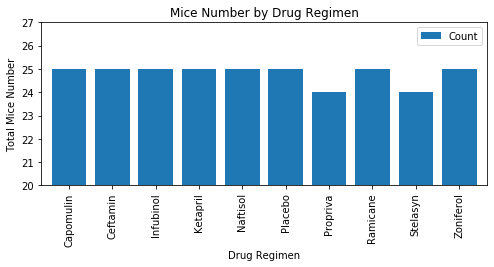

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_byRegimen = pd.DataFrame(clean_mice_df.groupby("Drug Regimen")['Mouse ID'].nunique())
mice_byRegimen = mice_byRegimen.rename(columns = {'Mouse ID': 'Count'}, inplace = False)
plot = mice_byRegimen.plot(kind='bar', ylim=(20,27), title='Mice Number by Drug Regimen', width=0.8, figsize=(8,3))
plot.set(ylabel="Total Mice Number")
plt.show()

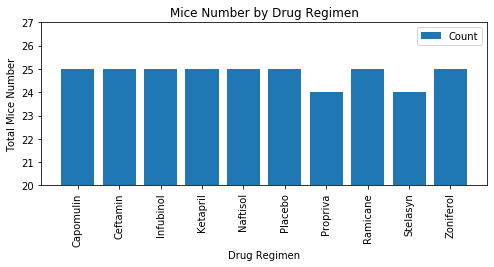

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mice_byRegimen.index
y_axis = mice_byRegimen['Count']
plt.figure(figsize=(8,3))
plt.bar(x_axis, y_axis, label='Count')
plt.title('Mice Number by Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Mice Number")
plt.ylim(20,27)
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

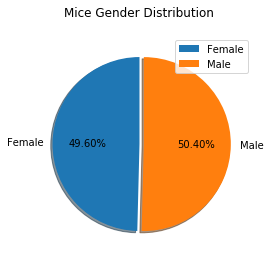

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = pd.DataFrame(clean_mice_df.groupby("Sex")['Mouse ID'].nunique())
mice_sex = mice_sex.rename(columns = {'Mouse ID': 'Count'}, inplace = False)

mice_sex.plot(kind='pie',subplots=True, autopct='%1.2f%%', startangle=90, explode=[0.05,0], shadow=True, 
              title='Mice Gender Distribution')
plt.ylabel ('')
plt.show()

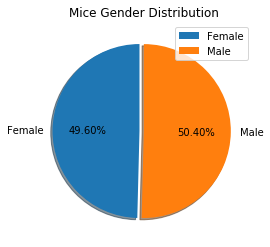

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = mice_sex['Count']
labels = mice_sex.index

plt.pie(values, labels=labels, autopct='%1.2f%%', startangle=90, explode=[0.05,0], shadow=True)
plt.title('Mice Gender Distribution')
plt.legend()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_vol = clean_mice_df.groupby(['Mouse ID', 'Drug Regimen']).agg(Timepoint = ('Timepoint', 'max'))

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_tumor_vol = max_tumor_vol.merge(clean_mice_df, how = 'inner', on = ['Mouse ID', 'Timepoint'])
max_tumor_vol.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = max_tumor_vol['Tumor Volume (mm3)'].loc[max_tumor_vol['Drug Regimen'] == regimen]
    
    # add subset 
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"For {regimen} the interquartile range is: {iqr}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {regimen} values below {lower_bound} are potential outliers.")
    print(f"For {regimen} values above {upper_bound} are potential outliers.\n")

For Capomulin the interquartile range is: 7.781863460000004
For Capomulin values below 20.70456164999999 are potential outliers.
For Capomulin values above 51.83201549 are potential outliers.

For Ramicane the interquartile range is: 9.098536719999998
For Ramicane values below 17.912664470000003 are potential outliers.
For Ramicane values above 54.30681135 are potential outliers.

For Infubinol the interquartile range is: 11.477135160000003
For Infubinol values below 36.83290494999999 are potential outliers.
For Infubinol values above 82.74144559000001 are potential outliers.

For Ceftamin the interquartile range is: 15.577752179999997
For Ceftamin values below 25.355449580000002 are potential outliers.
For Ceftamin values above 87.66645829999999 are potential outliers.



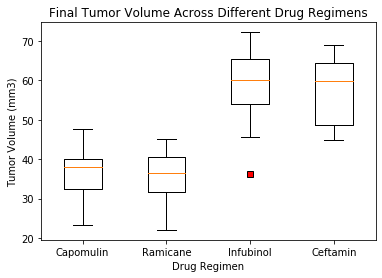

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, flierprops=red_square)
ax.set_title('Final Tumor Volume Across Different Drug Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Drug Regimen')
ax.set_xticklabels(regimens)
plt.show()

## Line and Scatter Plots

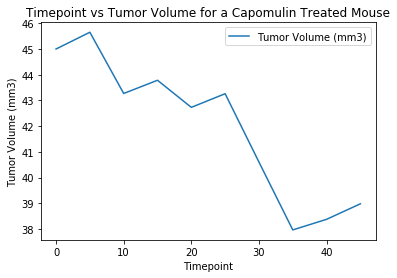

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice = pd.DataFrame(clean_mice_df[clean_mice_df['Drug Regimen'] == 'Capomulin'])
capomulin_mouse = capomulin_mice[capomulin_mice['Mouse ID'] == capomulin_mice.iloc[0]['Mouse ID']]
capomulin_mouse.plot(x='Timepoint',y='Tumor Volume (mm3)')
plt.title("Timepoint vs Tumor Volume for a Capomulin Treated Mouse")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

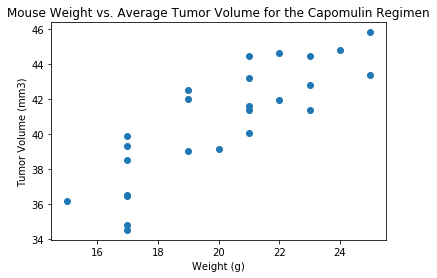

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mean_values = ['Weight (g)', 'Tumor Volume (mm3)']
capomulin_df = capomulin_mice.groupby('Mouse ID', as_index=False)[mean_values].mean()
mean_weight = capomulin_df['Weight (g)']
mean_volume = capomulin_df['Tumor Volume (mm3)']
plt.scatter(mean_weight, mean_volume)
plt.title("Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

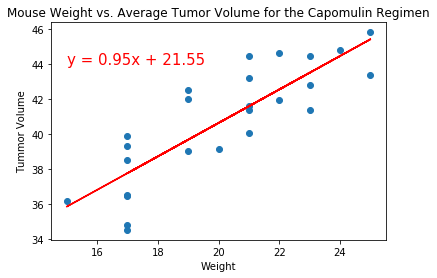

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mean_weight
y_values = mean_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,44),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tummor Volume')
plt.title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.show()